5) Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa

-> Cadeia Homogênea

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 


#Parametros
m, k, m1 = 1.0, 1.0, 5.0
N1, N2, N3 = 100, 1000, 10000

In [14]:
#Para N = 100

#matriz elastica
K1 = np.zeros((N1, N1))

for i in range(N1): #tamanho da cadeia
    K1[i,i] = 2 * k #diagonal (massas com 2 vizinhos)
    K1[i, (i - 1) % N1] = -k #vizinho anterior
    K1[i, (i + 1) % N1] = -k #vizinho posterior

#matriz de massa
M = np.eye(N1) * m

ww100, v100 = sp.linalg.eigh(K, M) #autovalores (omega^2) e autovetores (modos normais)
w100 = np.sqrt(np.abs(ww100)) #frequencias naturais

# Ordenação crescente (eigh já ordena, mas é redundante)
idx = np.argsort(w100)
w100 = w100[idx]
v100 = v100[:, idx]


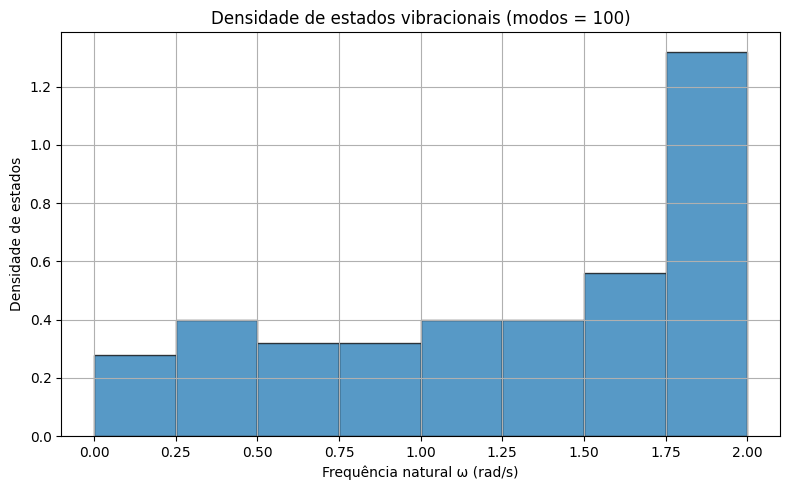

In [15]:
#histograma para N100
plt.figure(figsize=(8, 5))
plt.hist(w100, bins=8, density=True, edgecolor='black', alpha=0.75)
plt.xlabel('Frequência natural ω (rad/s)')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados vibracionais (modos = {})'.format(N1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
#N= 100 com erro de massa

#matriz elastica
K1_defeito = np.zeros((N1, N1))

for i in range(N1): #tamanho da cadeia
    K1_defeito[i,i] = 2 * k #diagonal (massas com 2 vizinhos)
    K1_defeito[i, (i - 1) % N1] = -k #vizinho anterior
    K1_defeito[i, (i + 1) % N1] = -k #vizinho posterior

#matriz de massa
M_defeito = np.eye(N1) * m
M_defeito[N1 // 2] = m1  # introduz o defeito no centro
M_defeito_inv_sqrt = np.diag(1 / np.sqrt(np.diag(M_defeito)))
D_def = M_defeito_inv_sqrt @ K @ M_defeito_inv_sqrt

ww100_defeito, v100_defeito = sp.linalg.eigh(D_def) #autovalores (omega^2) e autovetores (modos normais)
w100_defeito = np.sqrt(np.abs(ww100_defeito)) #frequencias naturais

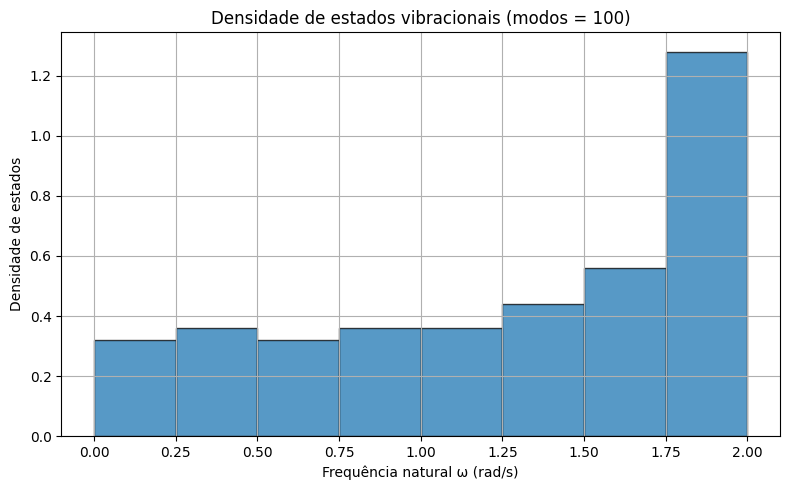

In [17]:
#histograma para N100 com defeito de massa
plt.figure(figsize=(8, 5))
plt.hist(w100_defeito, bins=8, density=True, edgecolor='black', alpha=0.75)
plt.xlabel('Frequência natural ω (rad/s)')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados vibracionais (modos = {})'.format(N1))
plt.grid(True)
plt.tight_layout()
plt.show()


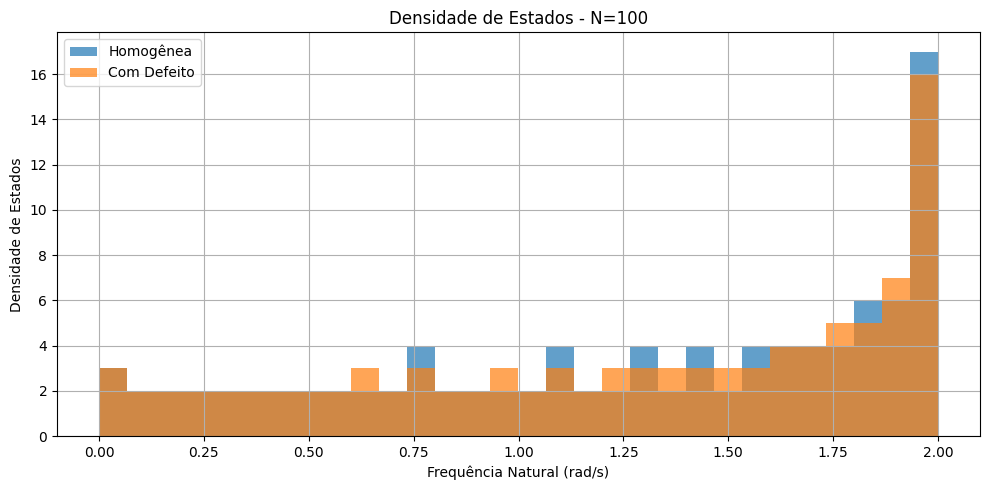

In [18]:
#histograma comparando os dois caso de N = 100

plt.figure(figsize=(10, 5))
plt.hist(w100, bins=30, alpha=0.7, label='Homogênea')
plt.hist(w100_defeito, bins=30, alpha=0.7, label='Com Defeito')
plt.xlabel('Frequência Natural (rad/s)')
plt.ylabel('Densidade de Estados')
plt.title('Densidade de Estados - N=100')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# N = 1000

#matriz elastica
K2 = np.zeros((N2, N2))

for i in range(N2): #tamanho da cadeia
    K2[i,i] = 2 * k #diagonal (massas com 2 vizinhos)
    K2[i, (i - 1) % N1] = -k #vizinho anterior
    K2[i, (i + 1) % N1] = -k #vizinho posterior

#matriz de massa
M2 = np.eye(N2) * m

ww1000, v1000 = sp.linalg.eigh(K, M) #autovalores (omega^2) e autovetores (modos normais)
w1000 = np.sqrt(np.abs(ww1000)) #frequencias naturais


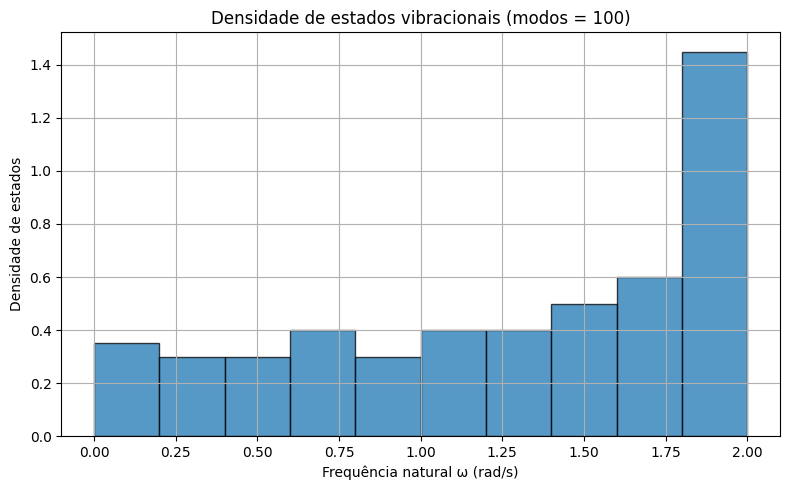

In [22]:
#histograma para N = 1000

plt.figure(figsize=(8, 5))
plt.hist(w1000, bins=10, density=True, edgecolor='black', alpha=0.75)
plt.xlabel('Frequência natural ω (rad/s)')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados vibracionais (modos = {})'.format(N1))
plt.grid(True)
plt.tight_layout()
plt.show()
